# Chapter 10. 로지스틱 회귀의 심화
## 3. ROC 커브와 AUC
### 01 - 정밀도와 민감도의 트레이드오프
- 성능지표 중 정밀도(precision)와 민감도(recall)는 일반적으로 동시에 상승하기 어려움
    - 임계값(threshold)에 따라 정밀도와 민감도의 변화가 일어남
    - 이로 인해 두 값을 모두 고려하여 성능을 측정하기 어려움
        - 이를 위해 나온 지표 중 하나가 **ROC** 커브

- **ROC** 커브
    - Receiver Operation Characteristics
    - 제2차 세계대전 중 레이더 이미지를 분석하는 신호감지 이론에서 시작함
    - 분류기의 임계값을 지속적으로 조정하여 정밀도와 민감도 간의 비율을 도식화하여 표현하는 기법 중 하나
    - 기본적으로 ROC 커브는 클래스의 예측 확률이 나오는 모델에 사용 가능

### 02 - ROC 커브 표현하기
- ROC 커브는 아래 그림과 같이 TPR(True Positive Rate)과 FPR(Flase Positive Rate)을 각각 $y, x$축에 나타내어 그래프를 작성
    - 그래프를 작성하기 위해 먼저 개발한 분류기 모델을 사용하여 각 데이터의 클래스를 예측
    - 그 후 Positive에 대한 예측 확률을 기준으로 각 데이터의 예측 확률을 정렬하여 표시하면 아래 표와 같음

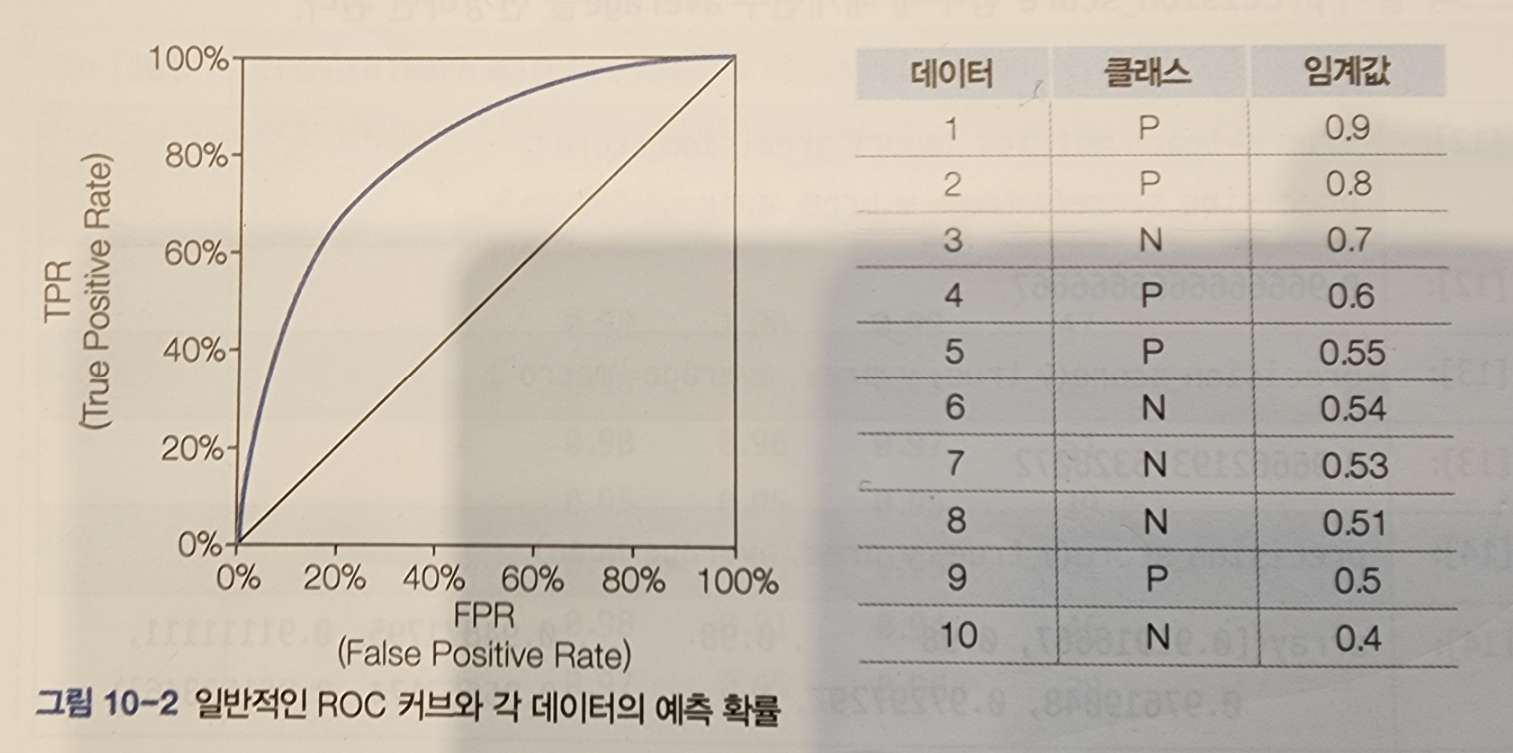

In [3]:
from IPython.display import Image
Image("C:\Machine_Learning (git)\chapter10\ROC Curve 1.jpg")

- 이렇게 정렬하여 정리된 'Positive 예측값'은 임계값을 사용하여 해당 값 기준으로 TPR, FPR 산출
- 아래 표를 보면 데이터 1은 처음 데이터를 기준으로 예측 확률이 0.9 이상일 경우만 Positive, 나머지는 Negative로 예측
    - 그럴 경우 TP, FP, TN, FN의 개수 산출
    - 예측 확률은 0.9 이상이므로 10개의 데이터 중 오직 1개만 Positive, 나머지는 Negative로 예측됨
        - 5개의 진짜 Negative 데이터는 정확히 예측했지만(True), 나머지 4개의 Positive 데이터는 모드 틀린 예측을 하게 됨(False)
    - 이로 인해 TPR : 0.2, FPR : 0이 됨
- 임계값을 계속 낮추면서 계속해서 TPR, FPR을 측정하면 아래 표와 같음

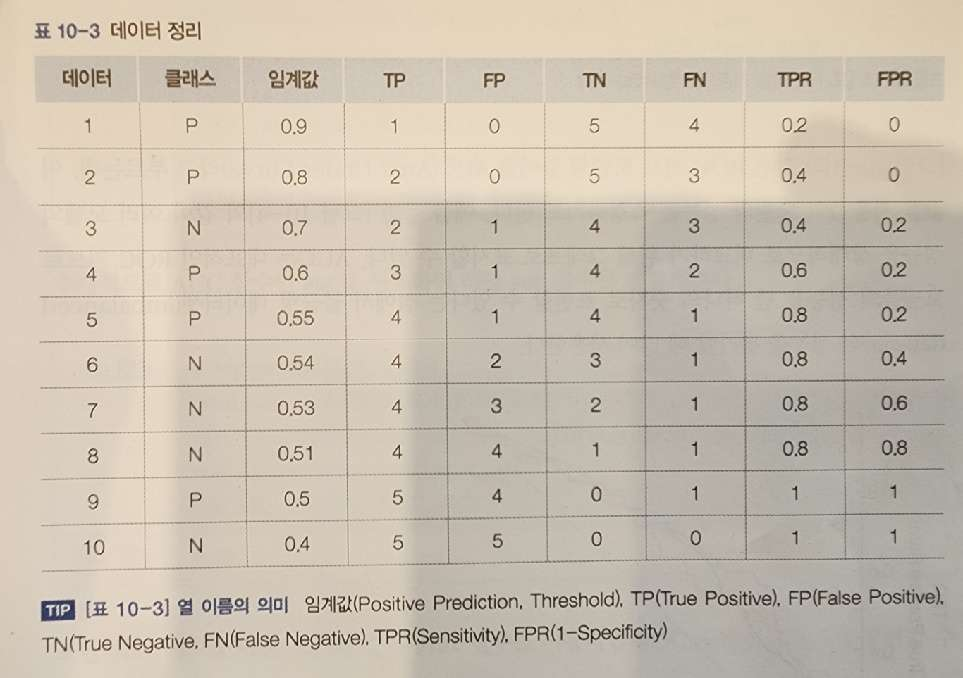

In [4]:
from IPython.display import Image
Image("C:\Machine_Learning (git)\chapter10\ROC Curve 2.jpg")

- 위 표를 기준으로 TPR, FPR의 값을 연결하여 그래프를 작성하면 아래 그림과 같이 ROC 커브를 그릴 수 있음

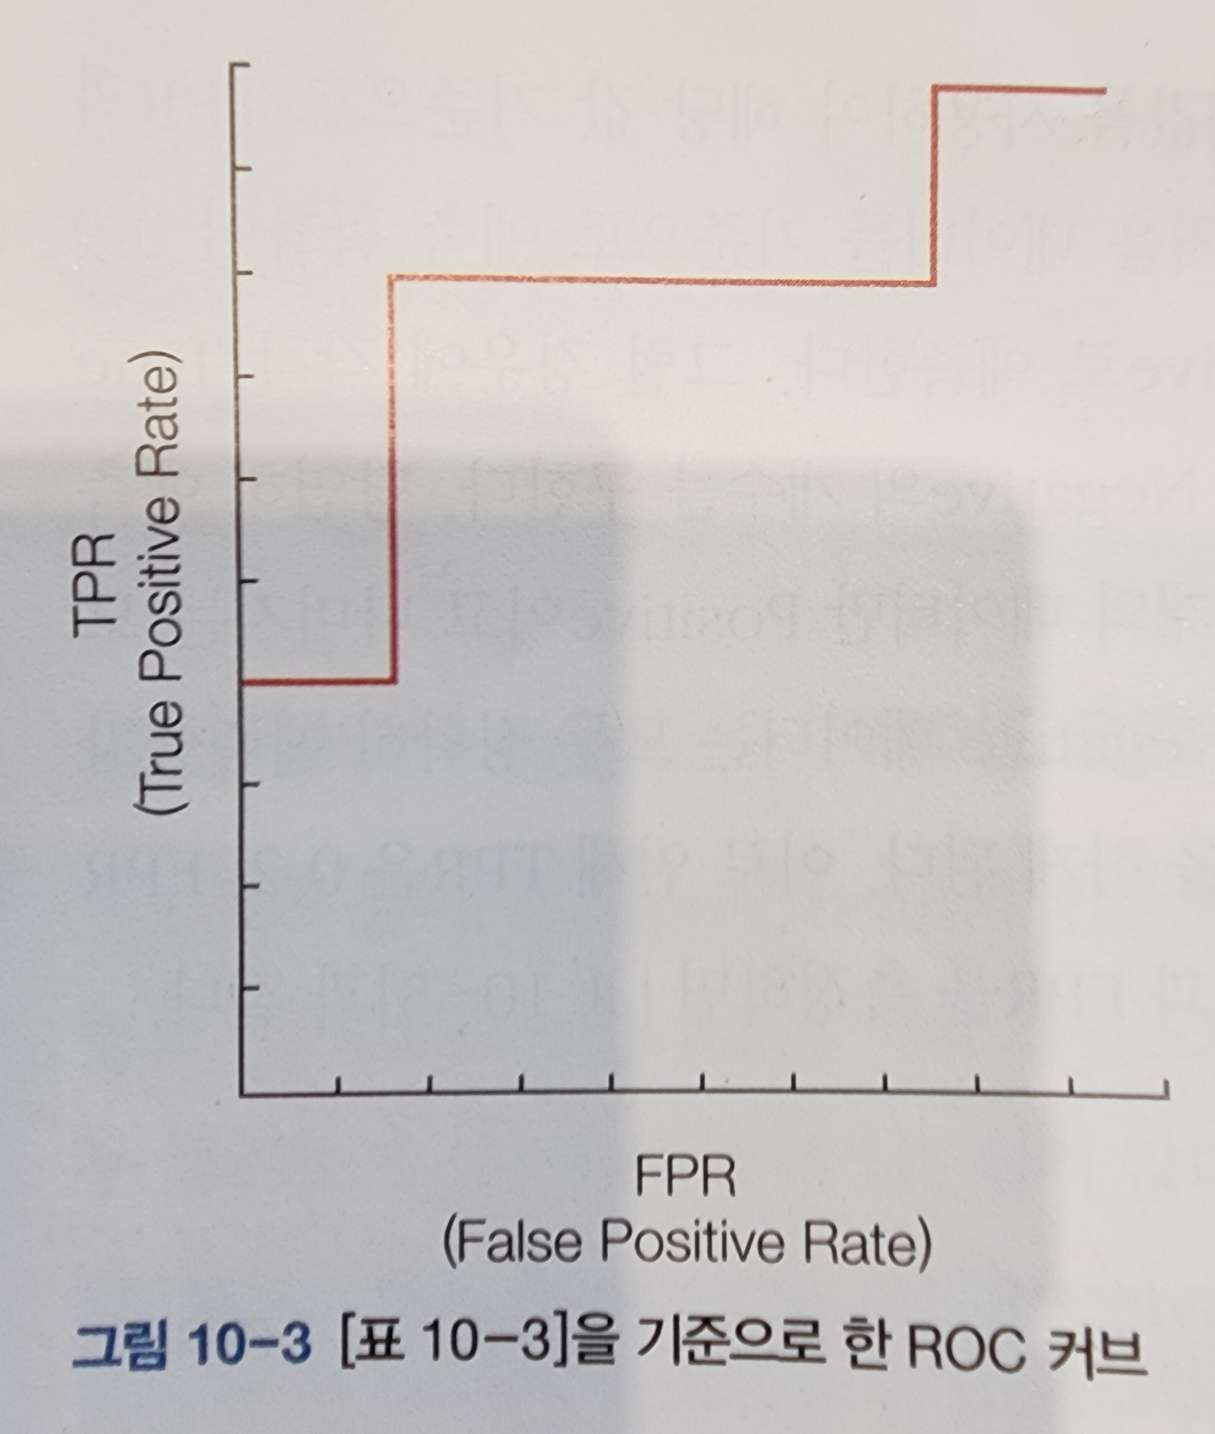

In [5]:
from IPython.display import Image
Image("C:\Machine_Learning (git)\chapter10\ROC Curve 3.jpg")

- 위 그림과 같은 ROC 커브 하단의 넓이를 **AUC(Area Under Curve)**라고 함
    - 이 값을 사용하여 모델의 성능을 측정하기도 함

- 아래 그림과 같이 여러 모델의 성능을 상대적으로 비교하기 위해 그래프로 표시할 수 있음
    - AUC는 대표적인 ROC 커브로 모델들의 성능을 단 하나의 숫자로 표현할 수 있음
        - 이 점으로 인해 불균형 데이터셋(imbalanced dataset)의 성능을 평가할 때 많이 사용

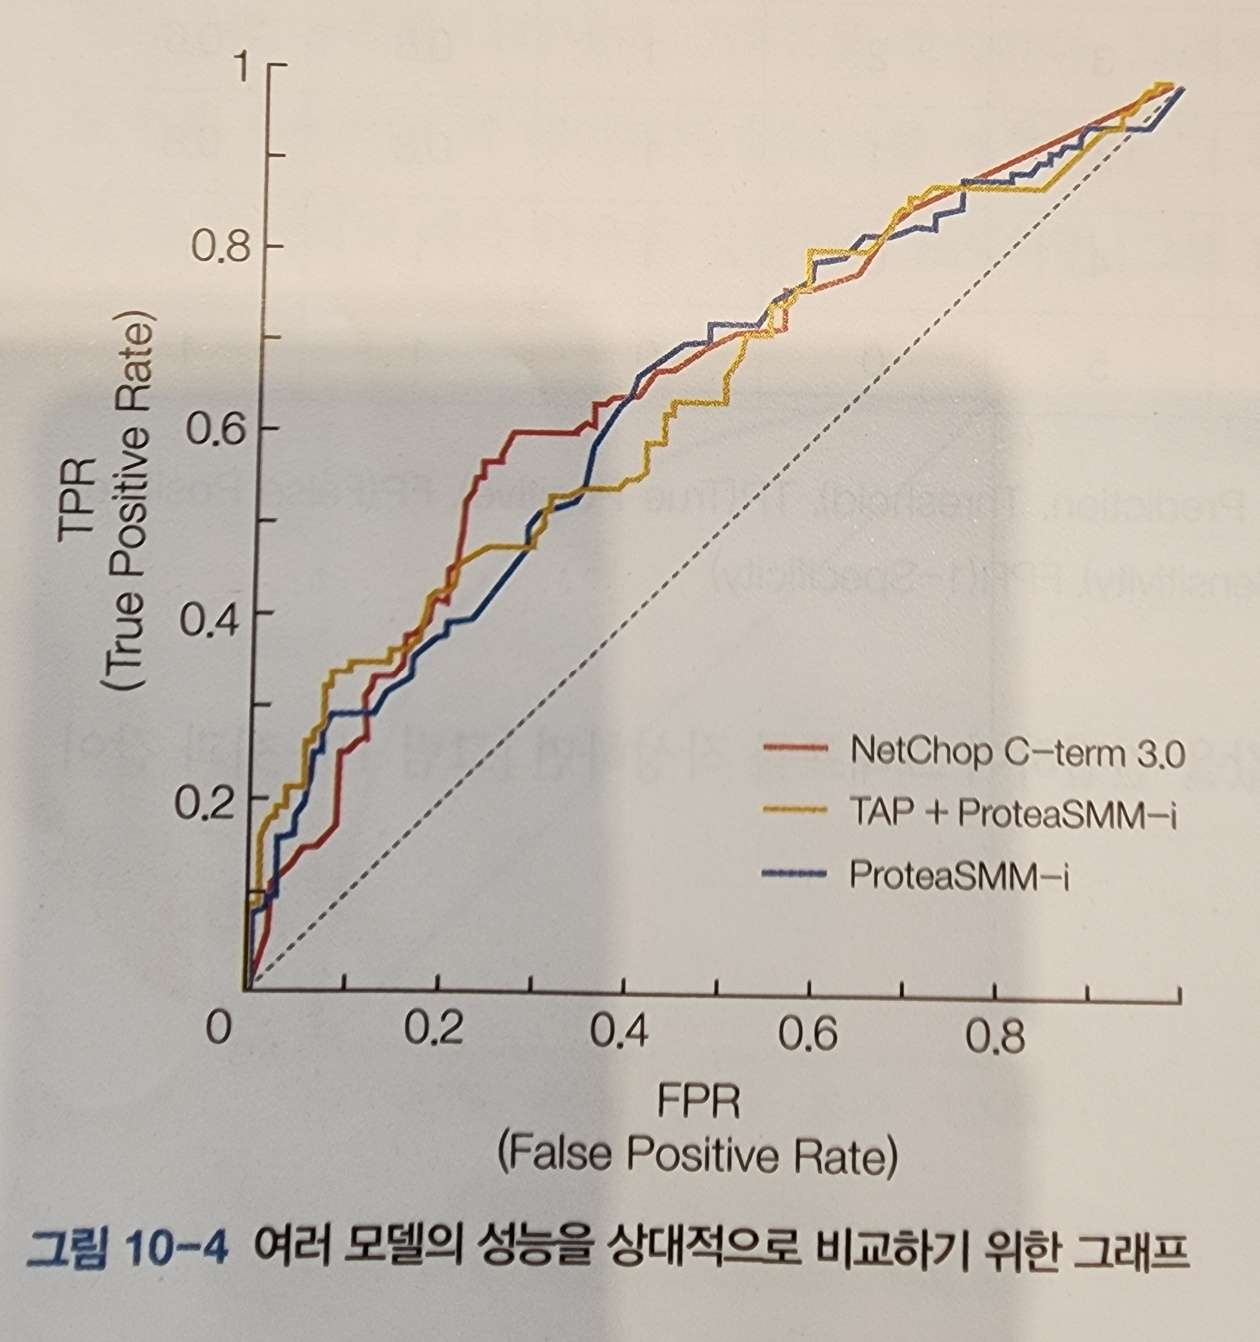

In [6]:
from IPython.display import Image
Image("C:\Machine_Learning (git)\chapter10\ROC Curve 4.jpg")

### 03 - ROC 커브와 AUC를 사이킷런 코드로 구현하기
- 사이킷런으로 ROC 커브, AUC를 계산할 수 있음
- 정답을 의미하는 y값과 각 항목별 예측 확률을 scores에 저장
    - 다음으로 ROC 커브 함수인 **roc_curve**를 사용
        - fpr, tpr과 함께 threshold 값을 반환

In [7]:
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, threshold = metrics.roc_curve(y, scores, pos_label= 2)

# fpr : array([0. , 0. , 0.5, 0.5, 1. ])
# tpr : array([0. , 0.5, 0.5, 1. , 1. ])
# threshold : array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [8]:
# 추가적으로 AUC 함수인 'auc'를 사용하면 해당 auc 점수를 반환해줌
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.75

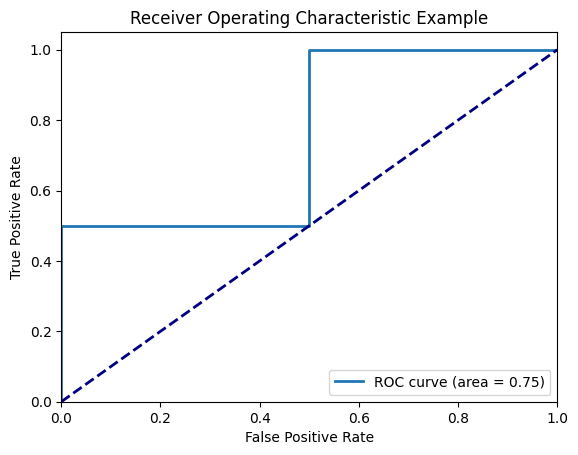

In [9]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc = 'lower right')
plt.show()